# Part I - (Students Performance Exploration)
## by (Oluwajuwon Oyalude)

## Introduction
> The dataset to be analyzed contains two subsets of student performance in two distinct subjects in two Portuguese schools. The subjects are maths and portuguese. I will be analyzing the students' performance in portuguese.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

> Load in your dataset and describe its properties through the questions below. Try and motivate your exploration goals through this section.


In [2]:
por = pd.read_csv('student-por.csv',sep=';')
por.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
print(por.shape)
print(por.isna().sum().sum())
print(por.duplicated().sum())

(649, 33)
0
0


The average of `G1`, `G2`, & `G3` can be computed to represent one entity

In [4]:
por['avg_G'] = (por['G1'] + por['G2'] + por['G3'])/3

In [5]:
# covert ordinal data to category where necessary
ordinal_var_dict = {'Medu':[0,1,2,3,4],
                   'Fedu':[0,1,2,3,4],
                   'famrel':[1,2,3,4,5]}

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_var_dict[var])
    por[var] = por[var].astype(ordered_var)

In [6]:
por.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   school      649 non-null    object  
 1   sex         649 non-null    object  
 2   age         649 non-null    int64   
 3   address     649 non-null    object  
 4   famsize     649 non-null    object  
 5   Pstatus     649 non-null    object  
 6   Medu        649 non-null    category
 7   Fedu        649 non-null    category
 8   Mjob        649 non-null    object  
 9   Fjob        649 non-null    object  
 10  reason      649 non-null    object  
 11  guardian    649 non-null    object  
 12  traveltime  649 non-null    int64   
 13  studytime   649 non-null    int64   
 14  failures    649 non-null    int64   
 15  schoolsup   649 non-null    object  
 16  famsup      649 non-null    object  
 17  paid        649 non-null    object  
 18  activities  649 non-null    object  
 19  nursery 

### What is the structure of your dataset?


> 
The dataset I analyzed contains information about 649 students performance in a portuguese subject with some information on their parental background spread across 33 columns. They are:
1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
8. Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 â€“ 5th to 9th grade, 3 â€“ secondary education or 4 â€“ higher education)
9. Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
10. Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
33. G3 - final grade (numeric: from 0 to 20)
34. avg_G - mean of all grades

They are mostly categorical variables of ordinal and nominal types.

[link to the dataset](https://archive.ics.uci.edu/ml/datasets/student+performance)

### What is/are the main feature(s) of interest in your dataset?

> I want to find out how parental factors affects student academic performance

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?


> The features I will be working with are Pstatus, Fedu, Medu, Fjob, Mjob, guardian, famrel, famsup, avg_G. However, I think that famsup will have strongest effect on the performance of the students

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.



Let's start by exploring the main variable of interest: `avg_G`

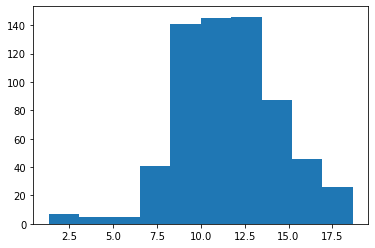

In [7]:
plt.hist(data=por, x='avg_G');

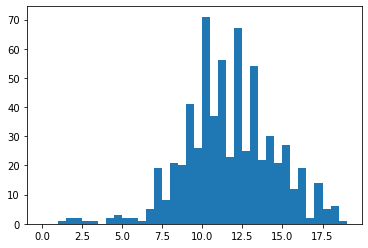

In [8]:
binsize = 0.5
bins = np.arange(0,por['avg_G'].max()+binsize,binsize)
plt.hist(data=por, x= 'avg_G', bins= bins);

The distribution of `avg_G` is approximately normal, but slightly skewed towards the left. This shows that there are some outliers. Some students have average grades less than 6.0. Let's take a look at them

In [9]:
por[por['avg_G'] <= 6.0]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,avg_G
440,MS,M,16,U,GT3,T,1,1,at_home,services,...,4,5,4,5,3,0,7,0,0,2.333333
519,MS,M,16,R,GT3,T,2,1,other,services,...,2,1,1,1,2,0,8,7,0,5.000000
523,MS,M,18,U,LE3,T,4,4,at_home,health,...,5,5,5,5,5,2,5,6,6,5.666667
563,MS,M,17,U,GT3,T,2,2,other,other,...,2,1,2,3,5,0,7,0,0,2.333333
567,MS,M,18,R,GT3,T,3,2,services,other,...,3,1,2,2,5,0,4,0,0,1.333333
572,MS,F,16,U,GT3,A,3,2,services,at_home,...,5,5,1,1,1,8,5,5,7,5.666667
583,MS,F,18,R,GT3,T,2,2,other,other,...,5,5,1,1,3,0,8,6,0,4.666667
586,MS,F,17,U,GT3,T,4,2,teacher,services,...,5,5,1,3,5,0,8,8,0,5.333333
597,MS,F,18,R,GT3,T,2,2,at_home,other,...,3,3,1,1,4,0,9,0,0,3.000000
603,MS,F,18,R,LE3,A,4,2,teacher,other,...,3,1,1,1,5,0,5,0,0,1.666667


They are mostly students who had zero in one or more of their grades. This is possible. I won't drop them because they are very likely to be valid data.

Let's move on to explore other variables.

In [10]:
def nominal_countplot(var):
    base_color = sb.color_palette()[0]
    
    por_counts = por[str(var)].value_counts()
    por_counts_index = por_counts.index
    
    sb.countplot(data=por, x= str(var), color= base_color, order= por_counts_index)
        
    
def ordinal_countplot(var):
    base_color = sb.color_palette()[0]
    
    sb.countplot(data=por, x= str(var), color= base_color)
   
    

Let's start with the nominal variables

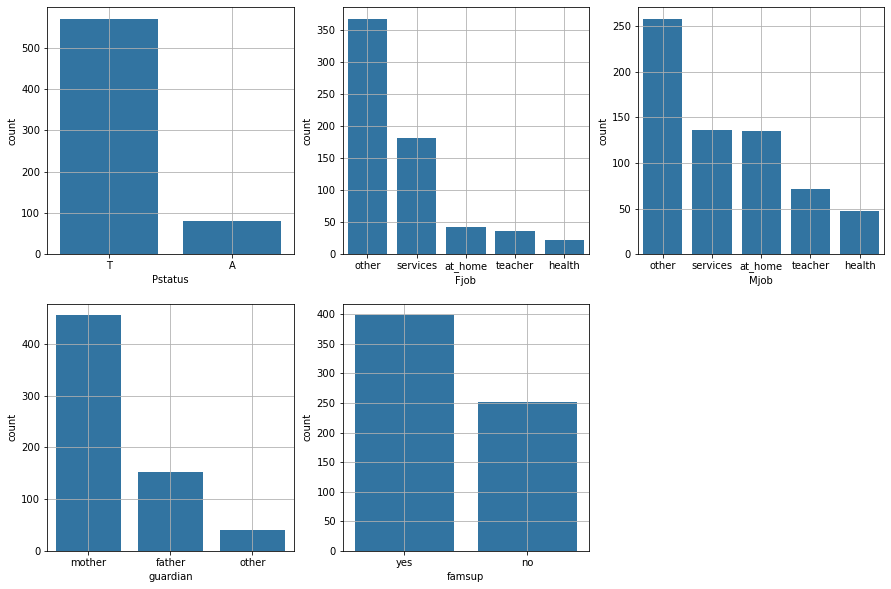

In [11]:
nominal_vars = ['Pstatus','Fjob','Mjob','guardian','famsup']
plt.figure(figsize=[15,10])
for i,j in enumerate(nominal_vars):
    plt.subplot(2,3,i+1)
    nominal_countplot(j)
    plt.grid()

- Over 500 parents are living together. The number of those living apart isn't up to 100
- The trend in the distribution of Fjob is the same as Mjob, only that the difference between services & at_home is higher in Fjob than in Mjob
- A very high number of students have their mother as their guardian than their fathers. Does this mean mothers are more responsible? 
- The number of students who have family support outweighs those who don't

Let's explore the ordinal variables

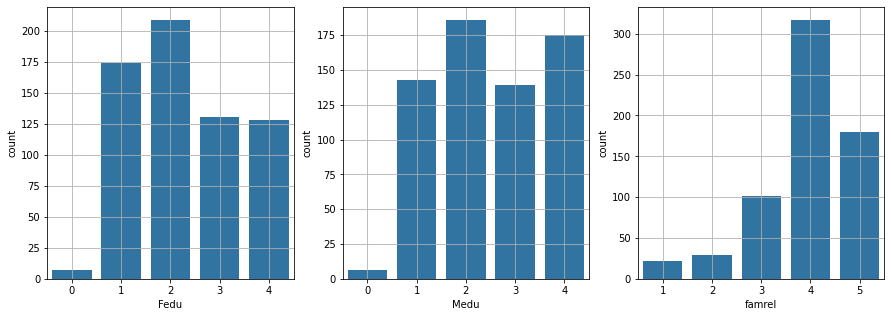

In [12]:
ordinal_vars = ['Fedu','Medu','famrel']
plt.figure(figsize=[15,5])
for i,j in enumerate(ordinal_vars):
    plt.subplot(1,3,i+1)
    ordinal_countplot(j)
    plt.grid()

- Comparing Fedu and Medu, the mothers have higher level of education than the fathers. This can be seen by comparing the counts for education levels 3 & 4. For education level 0, there is little or no difference between Fedu & Medu.
- Most (over 300) of the students say they have "Very good" relationship with their families. about 180 of them say they have 'excellent' family relationship. A little over 100 are neutral (neither good nor bad). Around 30 say 'Bad', and the rest have very bad about their relationship with their parents.



>**Rubric Tip**: Visualizations should depict the data appropriately so that the plots are easily interpretable. You should choose an appropriate plot type, data encodings, and formatting as needed. The formatting may include setting/adding the title, labels, legend, and comments. Also, do not overplot or incorrectly plot ordinal data.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> Your answer here!

- The distribution of `avg_G` is approximately normal, but slightly skewed towards the left. This shows that there are some outliers. Some students have average grades less than 6.0. Let's take a look at them
- `Pstatus`: Over 500 parents are living together. The number of those living apart isn't up to 100
- The trend in the distribution of `Fjob` is the same as Mjob, only that the difference between services & at_home is higher in Fjob than in Mjob
- `guardian`: A very high number of students have their mother as their guardian than father. Does this mean mothers are more responsible? 
- `famsup`: The number of students who have family support outweighs those who don't
- Comparing `Fedu` and `Medu`, the mothers have higher level of education than the fathers. This can be seen by comparing the counts for education levels 3 & 4
- `famrel`: Most (over 300) of the students say they have "Very good" relationship with their parents. about 180 of them say they have excellent. A little over 100 are neutral (neither good nor bad). Around 30 say 'Bad', and the rest have very bad about their relationship with their parents.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There wasn't any unusual distribution in the dataset. For `avg_G`, the few outliers are data of students who had very low score in one or more of their grades which is to be expected

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

How does the other variables vary with the students' average score?

In [13]:
def nominal_boxplot(var):
    base_color = sb.color_palette()[0]
    order = por[str(var)].value_counts().index
    sb.boxplot(data=por, y= 'avg_G', x= str(var), color= base_color, order= order)
    

In [14]:
def ordinal_boxplot(var):
    base_color = sb.color_palette()[0]
    sb.boxplot(data=por, y= 'avg_G', x= str(var), color= base_color)
    

In [45]:
def plot(list_):
    for i,j in enumerate(list_):
        if len(list_) > 3:
            plt.subplot(2,3,i+1)
            nominal_boxplot(j)
            plt.grid()
        elif len(list_)<=3:
            plt.subplot(1,3,i+1)
            ordinal_boxplot(j)
            plt.grid()

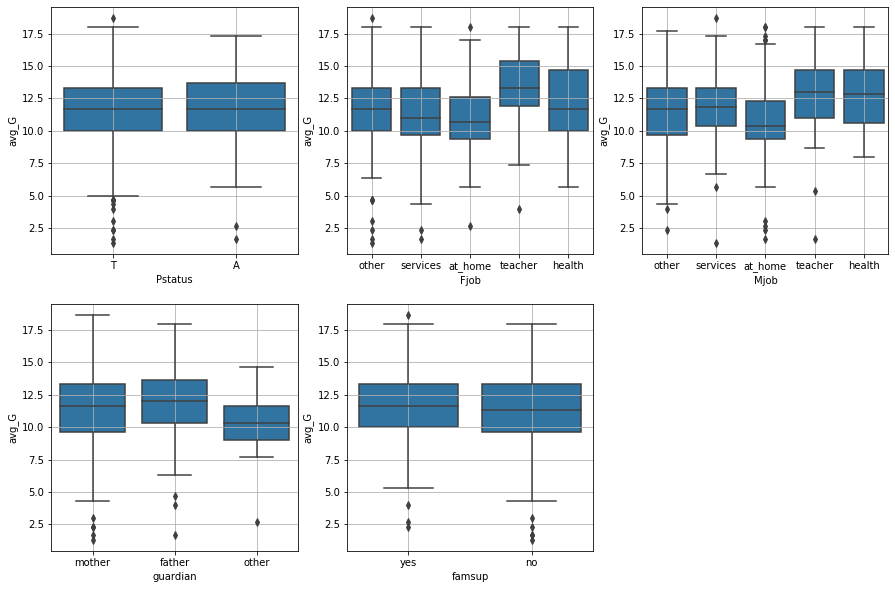

In [48]:
nominal_vars = ['Pstatus','Fjob','Mjob','guardian','famsup']
plt.figure(figsize= [15,10])
plot(nominal_vars)

- Investigating `Pstatus`: The performance of students whose parents are together isn't very different from those living apart
- In both `Fjob` and `Mjob`: the students whose parents are teachers had the best performance generally. The 
- `guardian`: Even though there are many who have their mothers as their guardians (seen in previous plots), students who have their fathers as their guardians performed better generally. Although, the preceeding got higher scores than the latter. Students who had their father or mother as their guardian performed better than those who didn't
- `famsup`: apparently, students with family support performed better than those who didn't but with very little difference. This is worthy of note since there is a big difference in their counts as seen previously in the Univariate analysis section.

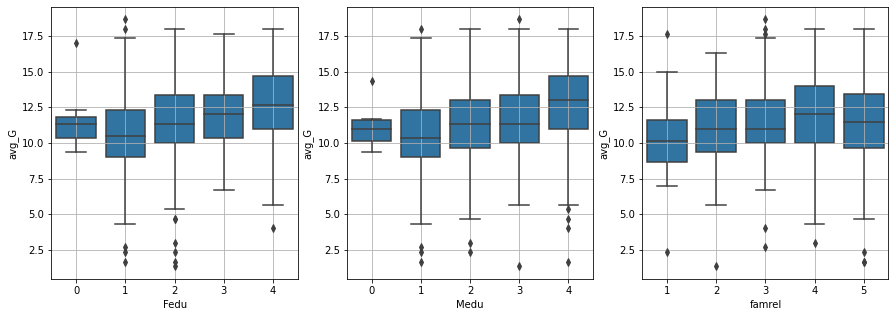

In [49]:
ordinal_vars = ['Fedu','Medu','famrel']
plt.figure(figsize=[15,5])
plot(ordinal_vars)

- Looking at `Fedu` & `Medu`, it is observed that, the higher the level of education of the parents, the better the performance of their children (the students). However, students whose parents have no education are seen to be highly competitive (that is, not poor performance). None of them got below 8 as compared to their counterparts.
- `famrel`: Generally, the better the quality of family relationships, the better the perfomance of students. However, students who had 'very good' family relationships performed better than those with'excellent' family relationships.

Let's investigate famsup against some other variables

In [52]:
def countplot(x,hue):
    sb.countplot(data=por,x=str(x),hue=str(hue))

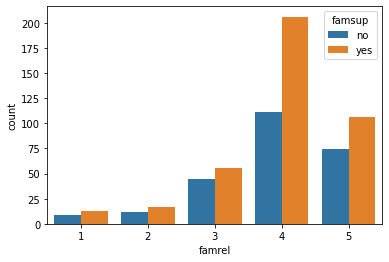

In [53]:
countplot('famrel','famsup')

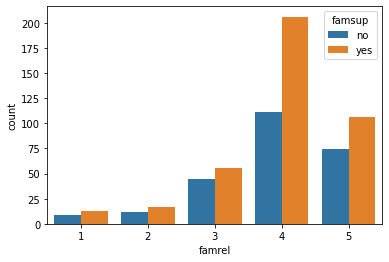

In [20]:
sb.countplot(data= por, x= 'famrel',hue= 'famsup');

- This could be the reason for the discrepancy seen in famrel previously. Students whose family relationships are 'very good' got more family support than those whose relationships are 'excellent'. This can be seen by comparing the difference between yes and no (famsup) in 4 & 5 (famrel).

Who tends to provide more support? Father or Mother?

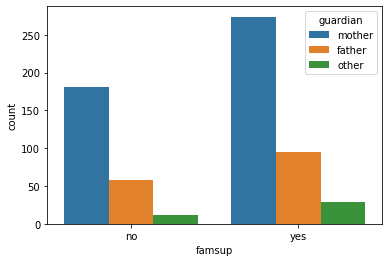

In [54]:
countplot('famsup','guardian')

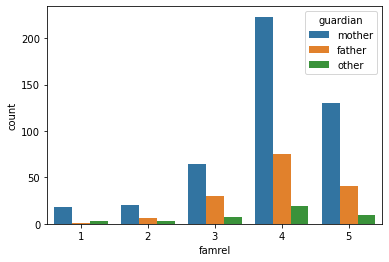

In [55]:
countplot('famrel','guardian')

Looking at the relationship btw famrel and guardian
- No where across the spectrum are fathers more than mothers. For students with very bad family relationships, their fathers are almost absent and this affects their academic performance as seen before.
- Furthermore, the ratio of mothers to fathers as student guardians is very large especially in family relationships: 'very good' and 'excellent'. This further tells that mothers tend to be there for their wards more than fathers.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Your answer here!
- Investigating `Pstatus`: The performance of students whose parents are together isn't very different from those living apart
- In both `Fjob` and `Mjob`: the students whose parents are teachers had the best performance generally.
- `guardian`: Even though there are many who have their mothers as their guardians. Students who have their fathers as their guardians performed better generally. Although, the preceding got the highest scores. Students who had their father or mother as their guardian performed better than those who didn't. Students with people other than their parents, as their guardians performed the poorest.
- `famsup`: apparently, students with family support performed better than those who didn't but with very little difference. This is worthy of note since there is a big difference in their counts as seen previously in the Univariate analysis section.
- Looking at `Fedu` & `Medu`, it is observed that, the higher the level of education of the parents, the better the performance of their children (the students). However, students whose parents have no education are seen to be highly competitive ( they didn't perform poorly). None of them got below 8 when compared with their counterparts.
- `famrel`: Generally, the better the quality of family relationships, the better the perfomance of students. However, students who had 'very good' family relationships performed better than those with'excellent' family relationships.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Your answer here!

Looking at the relationship btw famrel and guardian
- No where across the spectrum are fathers more than mothers. For students with very bad family relationships, their fathers are almost absent and this affects their academic performance as seen before.
- Furthermore, the ratio of mothers to fathers as student guardians is very large especially in family relationships: 'very good' and 'excellent'. This further tells that mothers tend to be there for their wards more than fathers.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

Let's investigate relationship btw jobs, family relationship and scores

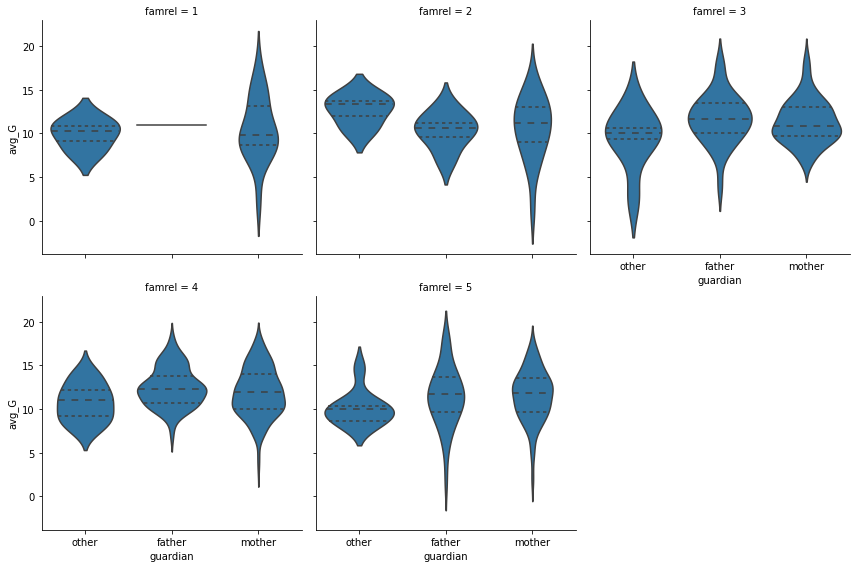

In [24]:
g = sb.FacetGrid(data = por, col = 'famrel',col_wrap=3, height=4)
g.map(sb.violinplot, 'guardian','avg_G',order = ['other','father','mother'],inner = 'quartiles');

- When Fathers are present as the guardian of the students, the better the quality of the relationship and consequently, the better the performance of students.

In [63]:
def FacetGrid_edu(edu,job):
    g = sb.FacetGrid(data = por, col = str(edu),col_wrap=3,height=4)
    g.map(sb.violinplot,str(job),'avg_G',inner='quartiles',order = ['teacher','other','health','services','at_home'])
    

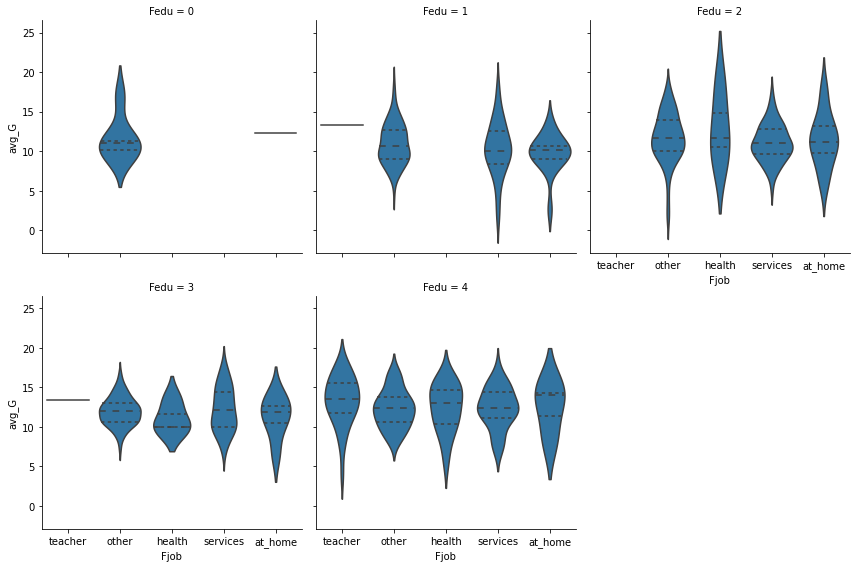

In [67]:
FacetGrid_edu('Fedu','Fjob')

- Generally, as the level of the father education increases, the higher the students performance. Furthermore, Teachers are the most educated of the professions in our dataset. Very few or Zero teachers had low education levels. This also had an effect on the performance of the students, students whose parents were teachers had the best performance. For those who were at home, and had higher education, they were almost at par with the students whose parents were teachers.

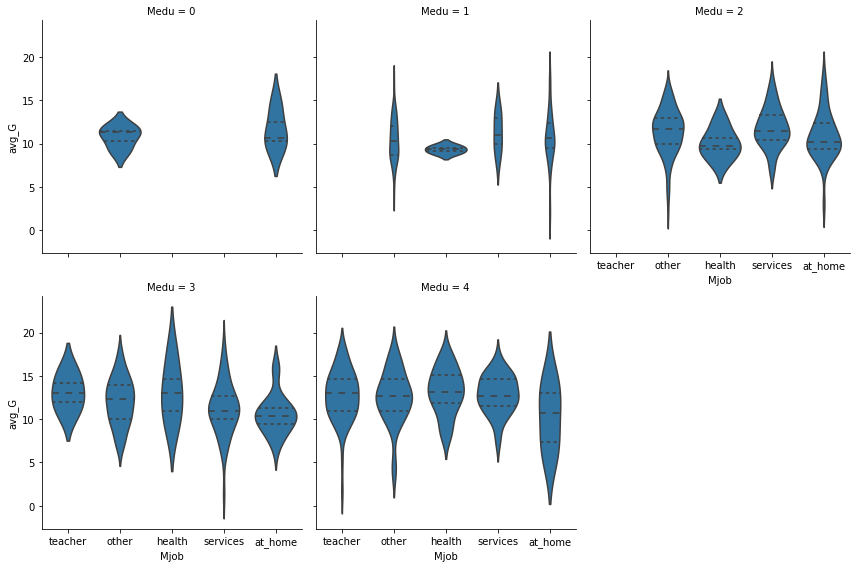

In [64]:
FacetGrid_edu('Medu','Mjob')

- Similar trend as fathers education is found in mothers education when compared in respect to their jobs and their child(s) performance. However, students whose mothers have higher education but stay at home generally perform poorly than those whose mothers' occupation is teaching, as opposed to the trend found in the fathers job.

In [60]:
def FacetGrid_famsup(var):
    g = sb.FacetGrid(data = por, col = 'famsup',col_wrap=3,height=4)
    g.map(sb.pointplot,str(var),'avg_G',inner='quartiles',order = ['teacher','other','health','services','at_home'],
      estimator = np.median)

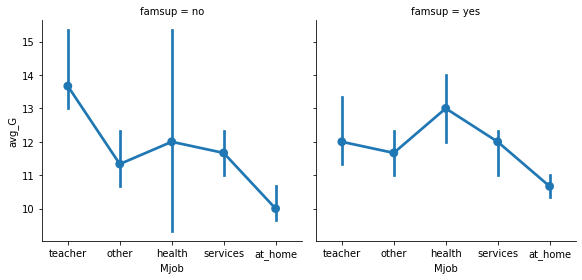

In [61]:
FacetGrid_famsup('Mjob')

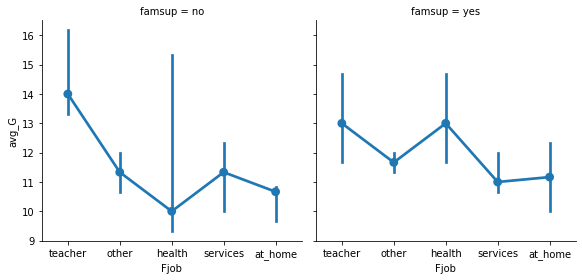

In [62]:
FacetGrid_famsup('Fjob')

- Suprisingly, when facetted by jobs, the median average-score of student who don't get family support is higher than those who get family support. This explains the little difference in the aggregated medians.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### Were there any interesting or surprising interactions between features?
- When Fathers are present as the guardian of the students, the better the quality of the relationship and consequently, the better the performance of students.
- Generally, as the level of the father education increases, the higher the students performance. Furthermore, Teachers are the most educated of the professions in our dataset. Very few or Zero teachers had low education levels. This also had an effect on the performance of the students, students whose parents were teachers had the best performance. For those who were at home, and had higher education, they were almost at par with the students whose parents were teachers. Similar trend as fathers education is found in mothers education when compared in respect to their jobs and their child(s) performance. However, students whose mothers have higher education but stay at home generally perform poorly than those whose mothers' occupation is teaching, as opposed to the trend found in the fathers job.
- Suprisingly, when facetted by jobs, the median average-score of student who don't get family support is higher than those who get family support. This explains the little difference in the aggregated medians.